In [1]:
from CollabFilterOneVectorPerItem import *
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer, root_mean_squared_error, mean_absolute_error
from train_valid_test_loader import load_train_valid_test_datasets

In [76]:
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
scoring = {'RMSE' : rmse_scorer, 'MAE' : mae_scorer}
steps = [0.8, 0.7, 0.6, 0.5, 0.1]
def find_best_step(n_users, n_items, train_tuple, valid_tuple, alpha=0.0):
        MAE_valid_per_step  = []
        RMSE_valid_per_step = []
        MAE_train_per_step  = []
        RMSE_train_per_step = []
        epochs_per_step = []
        scoring = {'RMSE' : rmse_scorer, 'MAE' : mae_scorer}
        for step in steps:
            model = CollabFilterOneVectorPerItem(
                n_epochs=400, batch_size=1000, step_size=step,
                n_factors=50, alpha=alpha)
            model.init_parameter_dict(n_users, n_items, train_tuple)
            model.fit(train_tuple, valid_tuple)
            MAE_valid_per_step.append(model.trace_mae_valid)
            RMSE_valid_per_step.append(model.trace_rmse_valid)
            epochs_per_step.append(model.trace_epoch)
        return MAE_valid_per_step, RMSE_valid_per_step, MAE_train_per_step, RMSE_train_per_step, epochs_per_step

In [59]:
def graph(x_vals_per_step, y_vals_per_step, y_title, main_title, experiment_var_list):
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'aqua', 'pink']
    print(len(x_vals_per_step))
    for i in range(len(x_vals_per_step)):
        print(i)
        plt.plot(x_vals_per_step[i], y_vals_per_step[i], '.-', color=colors[i], label=str(experiment_var_list[i]))
    plt.ylabel(y_title)
    plt.legend(bbox_to_anchor=(1.33, 0.5))
    plt.xlabel("Epoch")
    plt.ylim(top=1.2)
    plt.title(main_title)

In [ ]:
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
        load_train_valid_test_datasets()
MAE_per_step, RMSE_per_step, MAE_train_per_step, RMSE_train_per_step, epochs_per_step = find_best_step(n_users, n_items, train_tuple, valid_tuple)

[    0     1     2 ... 89989 89990 89991]
epoch       0.000 | loss_total     5.54130 | tr RMSE     2.29508 | va RMSE     2.28127 | grad_wrt_mu     4.12717 | grad_wrt_b_per_user     0.00438 | grad_wrt_c_per_item     0.00245 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     2.90807 | tr RMSE     1.72957 | va RMSE     1.73904 | grad_wrt_mu     2.59383 | grad_wrt_b_per_user     0.00296 | grad_wrt_c_per_item     0.00167 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     1.83973 | tr RMSE     1.36156 | va RMSE     1.35155 | grad_wrt_mu     1.58140 | grad_wrt_b_per_user     0.00196 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     1.60276 | tr RMSE     1.22864 | va RMSE     1.23270 | grad_wrt_mu     1.12060 | grad_wrt_b_per_user     0.00174 | grad_wrt_c_per_item     0.00105 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total    

5
5
5
5
0
1
2
3
4


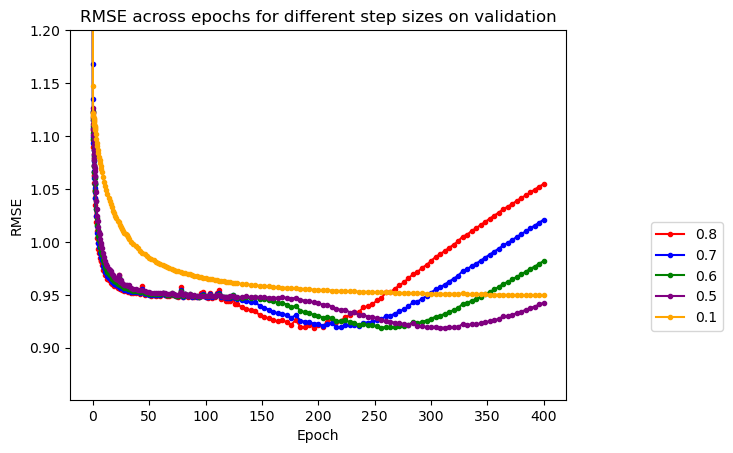

In [69]:
print(len(RMSE_per_step))
print(len(MAE_per_step))
print(len(epochs_per_step))
graph(epochs_per_step, RMSE_per_step, "RMSE", "RMSE across epochs for different step sizes on validation", steps)

5
0
1
2
3
4


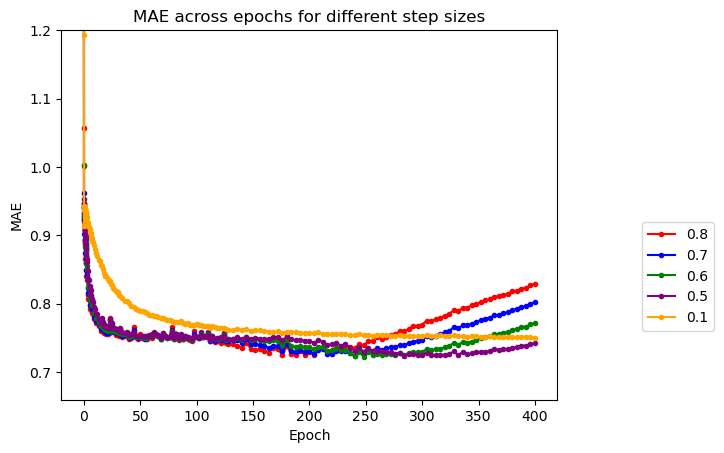

In [67]:
graph(epochs_per_step, MAE_per_step, "MAE", "MAE across epochs for different step sizes", steps)

In [ ]:
min_RMSE_index = []
min_RMSE = []
min_MAE_index = []
min_MAE = []
for i, RMSE in enumerate(RMSE_per_step):    
    print("step:", steps[i])
    print("min RMSE:", min(RMSE))
    print("min MAE:", min(MAE_per_step[i]))
    print("MAE lowest index:", MAE_per_step[i].index(min(MAE_per_step[i])))
    print("RMSE lowest index:", RMSE.index(min(RMSE)))
    print("epoch for RMSE:", epochs_per_step[i][RMSE.index(min(RMSE))])
    print("epoch for MAE:", epochs_per_step[i][MAE_per_step[i].index(min(MAE_per_step[i]))])
    min_RMSE_index.append(RMSE.index(min(RMSE)))
    min_RMSE.append(min(RMSE))
    min_MAE_index.append(MAE_per_step[i].index(min(MAE_per_step[i])))
    min_MAE.append(min(MAE_per_step[i]))
    print("-------")
print(min(min_RMSE))
print(min(min_MAE))
print("RMSE min index:", min_RMSE.index(min(min_RMSE)))
print("MAE min index:", min_MAE.index(min(min_MAE)))

step: 0.8
min RMSE: 0.9190946594411507
min MAE: 0.7246655232569181
MAE lowest index: 118
RMSE lowest index: 120
epoch for RMSE: 196.0
epoch for MAE: 188.0
-------
step: 0.7
min RMSE: 0.9194073522024324
min MAE: 0.7241643348290103
MAE lowest index: 131
RMSE lowest index: 126
epoch for RMSE: 220.0
epoch for MAE: 240.0
-------
step: 0.6
min RMSE: 0.9190878985373906
min MAE: 0.722770583364936
MAE lowest index: 133
RMSE lowest index: 135
epoch for RMSE: 256.0
epoch for MAE: 248.0
-------
step: 0.5
min RMSE: 0.9190420135065864
min MAE: 0.7239573524725061
MAE lowest index: 142
RMSE lowest index: 149
epoch for RMSE: 312.0
epoch for MAE: 284.0
-------
step: 0.1
min RMSE: 0.9495459048714832
min MAE: 0.750436436253742
MAE lowest index: 171
RMSE lowest index: 171
epoch for RMSE: 399.98571428571563
epoch for MAE: 399.98571428571563
-------
0.9190420135065864
0.722770583364936
RMSE index: 3
MAE index: 2


Based on the graph and this data, for alpha=0, we want step size = 0.5

In [ ]:
def get_data_for_diff_K(n_users, n_items, train_tuple, valid_tuple):
    MAE_valid_per_K  = []
    RMSE_valid_per_K = []
    MAE_train_per_K  = []
    RMSE_train_per_K = []
    best_step = 0.5
    epochs_per_K = []
    for K in [2, 10, 50]:
        model = CollabFilterOneVectorPerItem(
                    n_epochs=400, batch_size=1000, step_size=0.5,
                    n_factors=K, alpha=0.0)
        model.init_parameter_dict(n_users, n_items, train_tuple)
        model.fit(train_tuple, valid_tuple)
        MAE_valid_per_K.append(model.trace_mae_valid)
        RMSE_valid_per_K.append(model.trace_rmse_valid)
        MAE_train_per_K.append(model.trace_mae_train)
        RMSE_train_per_K.append(model.trace_rmse_train)
        epochs_per_K.append(model.trace_epoch)
    return MAE_valid_per_K, RMSE_valid_per_K, MAE_train_per_K, RMSE_train_per_K, epochs_per_K

In [ ]:
MAE_valid_per_K, RMSE_valid_per_K, MAE_train_per_K, RMSE_train_per_K, epochs_per_K = get_data_for_diff_K(n_users, n_items, train_tuple, valid_tuple)

epoch       0.000 | loss_total     5.55475 | tr RMSE     2.29508 | va RMSE     2.28127 | grad_wrt_mu     4.10917 | grad_wrt_b_per_user     0.00436 | grad_wrt_c_per_item     0.00244 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     1.22506 | tr RMSE     1.12669 | va RMSE     1.12528 | grad_wrt_mu     0.16093 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     1.26726 | tr RMSE     1.12435 | va RMSE     1.12199 | grad_wrt_mu     0.14248 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     1.29065 | tr RMSE     1.12703 | va RMSE     1.12387 | grad_wrt_mu     0.18547 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     1.23911 | tr RMSE     1.11848 | va RMSE  

[[2.2812694689863027, 1.1252813679905587, 1.1219937674841498, 1.1238670661552435, 1.1170005373422898, 1.111772509412743, 1.106890341880386, 1.1022775039662909, 1.0972217259011232, 1.0915434438167528, 1.0871531310975044, 1.0838057832916421, 1.0792068356032642, 1.077434989682142, 1.072218876609685, 1.0700321731741023, 1.0655049384724378, 1.0624705422893217, 1.0600808642709325, 1.058186056113237, 1.0469745548302067, 1.038769756252525, 1.0306751853465588, 1.0254071024743776, 1.0188818280948235, 1.0141061829110107, 1.0097972181505026, 1.0057210299841428, 1.0027640826055466, 0.9995722821178238, 0.9962920474931594, 0.9936869009306722, 0.9902742726848125, 0.9860118470073586, 0.9827707408964357, 0.979289771203308, 0.977521716134255, 0.9744309421342813, 0.9729427529091419, 0.9709437267437147, 0.9694343251885971, 0.9710157239459553, 0.9668814539730389, 0.9657329137937967, 0.9648049179111482, 0.9637295075516926, 0.9635641593145539, 0.9627940596601307, 0.9612869097800709, 0.9607075163964899, 0.9601

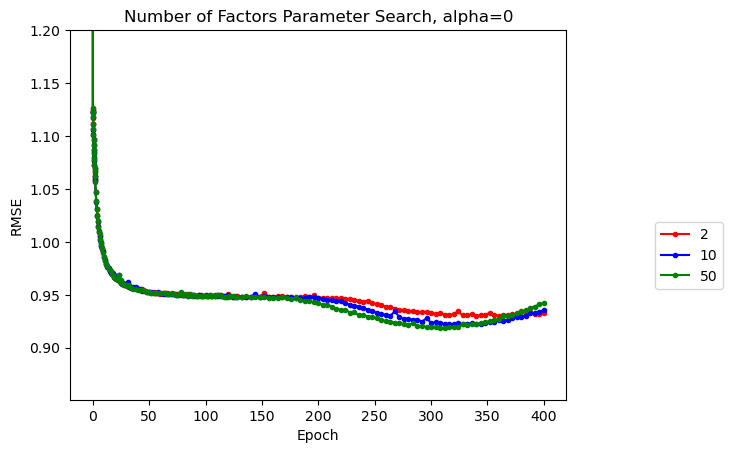

In [ ]:
K = [2, 10, 50]
print(RMSE_valid_per_K)
graph(epochs_per_K, RMSE_valid_per_K, RMSE_train_per_K, "RMSE", "Number of Factors Parameter Search, alpha=0", K)

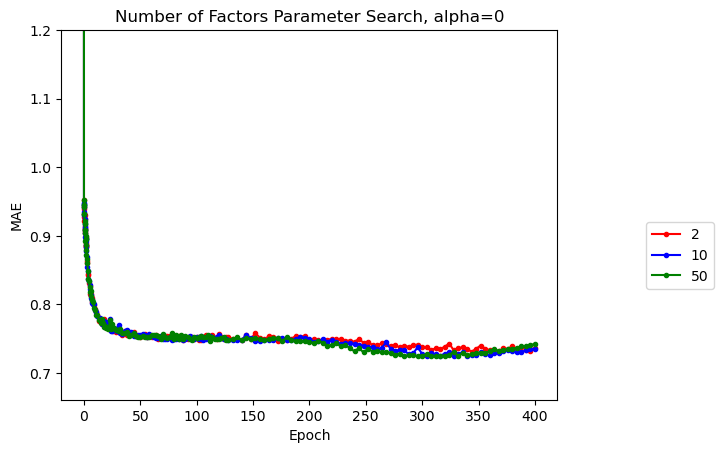

In [48]:
graph(epochs_per_K, MAE_valid_per_K, "MAE", "Number of Factors Parameter Search, alpha=0", K)

In [52]:
for i, RMSE in enumerate(RMSE_valid_per_K):
    print("K:", K[i])
    print("min RMSE:", min(RMSE))
    print("min MAE:", min(MAE_valid_per_K[i]))
    print("MAE lowest index:", MAE_valid_per_K[i].index(min(MAE_valid_per_K[i])))
    print("RMSE lowest index:", RMSE.index(min(RMSE)))
    print("epoch:", epochs_per_K[i][RMSE.index(min(RMSE))])
    print("-------")

K: 2
min RMSE: 0.9302761393761324
min MAE: 0.7307538987692744
MAE lowest index: 162
RMSE lowest index: 156
epoch: 340.0
-------
K: 10
min RMSE: 0.922046867291473
min MAE: 0.7244921531102323
MAE lowest index: 156
RMSE lowest index: 153
epoch: 328.0
-------
K: 50
min RMSE: 0.9190420135065864
min MAE: 0.7239573524725061
MAE lowest index: 142
RMSE lowest index: 149
epoch: 312.0
-------


In [77]:
MAE_per_step, RMSE_per_step, MAE_train_per_step, RMSE_train_per_step, epochs_per_step = find_best_step(n_users, n_items, train_tuple, valid_tuple, alpha=1)

epoch       0.000 | loss_total     5.54143 | tr RMSE     2.29508 | va RMSE     2.28127 | grad_wrt_mu     4.12717 | grad_wrt_b_per_user     0.00438 | grad_wrt_c_per_item     0.00245 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     2.90820 | tr RMSE     1.72957 | va RMSE     1.73904 | grad_wrt_mu     2.59383 | grad_wrt_b_per_user     0.00296 | grad_wrt_c_per_item     0.00167 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     1.83986 | tr RMSE     1.36156 | va RMSE     1.35155 | grad_wrt_mu     1.58140 | grad_wrt_b_per_user     0.00196 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     1.60289 | tr RMSE     1.22864 | va RMSE     1.23270 | grad_wrt_mu     1.12060 | grad_wrt_b_per_user     0.00174 | grad_wrt_c_per_item     0.00105 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     1.13034 | tr RMSE     1.11576 | va RMSE  

KeyboardInterrupt: 